# Adaboost Classifier - Credit Card Fraud
Dataset downloaded from Kaggle: [card_transdata.csv](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)

---
* Digital payments are evolving, but so are cyber criminals.

* According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

* In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

#### Feature Explanation:

`distancefromhome` - the distance from home where the transaction happened.

`distancefromlast_transaction` - the distance from last transaction happened.

`ratiotomedianpurchaseprice` - Ratio of purchased price transaction to median purchase price.

`repeat_retailer` - Is the transaction happened from same retailer.

`used_chip` - Is the transaction through chip (credit card).

`usedpinnumber` - Is the transaction happened by using PIN number.

`online_order` - Is the transaction an online order.

`fraud` - Is the transaction fraudulent.
<br><br>

### Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Data Reading

In [2]:
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [4]:
print('Dataset have {} rows and {} features'.format(df.shape[0],df.shape[1]))

Dataset have 1000000 rows and 8 features


### Handling Null Values

In [5]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

No Null/blank values in our dataset

### Resampling Data
We have 1000000 rows in Dataset. Processing this much data will be heavy on system and will be slow process. hence we will resample it to reduce the data rows.

In [6]:
%matplotlib inline
sns.set_theme()

#### Fraud and Non Fraud Data ratio in Dataset

Text(0.5, 1.0, 'fraud vs no-fraud transactions')

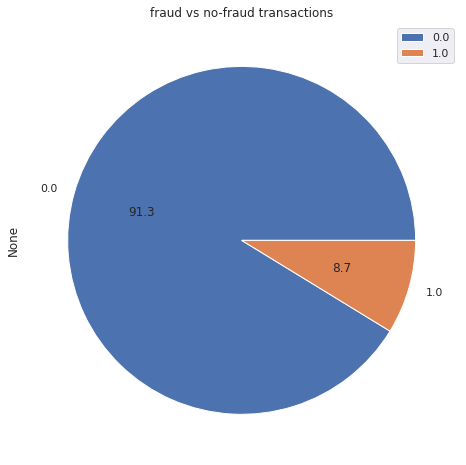

In [14]:
df.value_counts('fraud').plot.pie(figsize=(8,8), autopct='%.1f')
plt.legend()
plt.title('fraud vs no-fraud transactions')

We can see non-fraud transactions data is higher in  ratio (in the dataset).<br>
We update and create new dataset for:
* balancing Target feature in Dataset
* To reduce size of dataset for fast processing
<br><br>

We will **resample dataset**

In [15]:
# we will first separate data
real = df[df['fraud']==0]
fraud = df[df['fraud']==1]

In [16]:
real_resample = real.sample(n=87000, random_state=1)
fraud_resample = fraud.sample(n=87000, random_state=1)

In [17]:
df0 = pd.concat([real_resample,fraud_resample],axis=0)

Text(0.5, 1.0, 'fraud vs no-fraud transactions -- Resample Data')

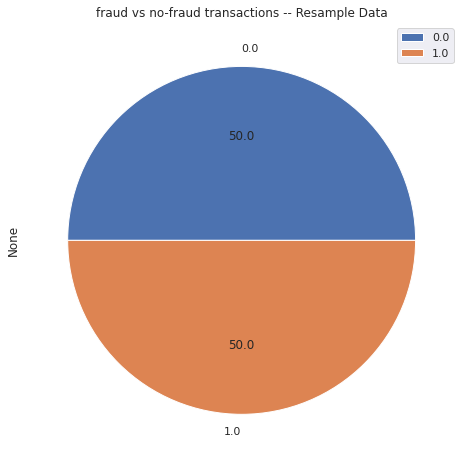

In [18]:
df0.value_counts('fraud').plot.pie(figsize=(8,8), autopct='%.1f')
plt.legend()
plt.title('fraud vs no-fraud transactions -- Resample Data')

Now Target feature values have equal contribution to Dataset. New dataset have less rows than original, hence processing will be faster than previous.

<AxesSubplot:>

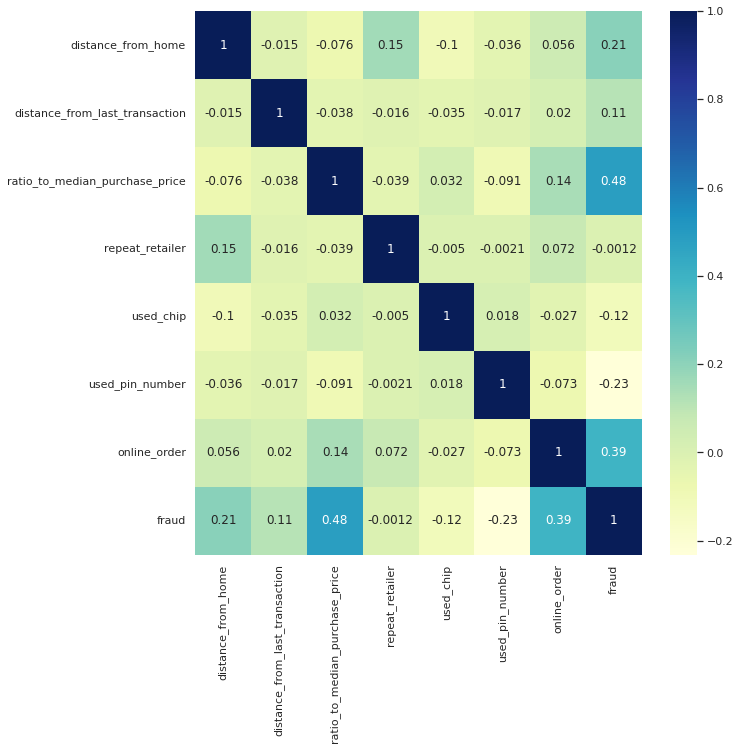

In [59]:
corr = df0.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='YlGnBu')

## Splitting Dataset
* For training our dataset and testing it for accuracy score, We will separate it into train and test.
* Create AdaboostClassifier model
* Test model and check accuracy
* Create New sample from Original dataset and check accuracy on that data.

In [33]:
# separating dependent and independent variables
X = np.array(df0.drop(columns='fraud'))
y = np.array(df0['fraud'])

In [37]:
# separate Train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print('Dataset splitted into train test successfully')

Dataset splitted into train test successfully


In [46]:
# model creation
model = AdaBoostClassifier(n_estimators=51, random_state=1)
model.fit(X_train, y_train)
# prediction on X_test
y_pred = model.predict(X_test)

#### Accuracy Score

In [47]:
# calculating accuracy
print('Model Train Accuracy: ',accuracy_score(y_train, model.predict(X_train)))
print('Model Test Accuracy: ',accuracy_score(y_test, y_pred))

Model Train Accuracy:  0.9995114942528736
Model Test Accuracy:  0.9991954022988506


### New Sample from Original dataset
We will create new sample from original dataset for testing our model

In [53]:
df_test = df.sample(n=100000)
df_x = np.array(df_test.drop(columns='fraud'))
df_y = np.array(df_test['fraud'])

In [60]:
df_pred = model.predict(df_x)
print('Accuracy on New Sample: ', accuracy_score(df_y, df_pred))

Accuracy on New Sample:  0.99974


## Confusion Matrix and Classification Reports

<AxesSubplot:>

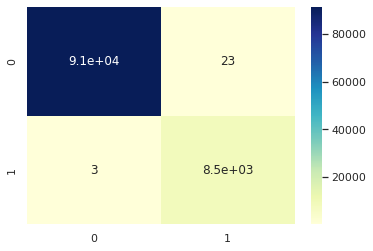

In [58]:
conf = confusion_matrix(df_y, df_pred)
sns.heatmap(conf, annot=True, cmap='YlGnBu')

In [62]:
print(classification_report(df_y, df_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91448
         1.0       1.00      1.00      1.00      8552

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



## Conclusion
* We have implemented  model with 99% accuracy, which is excellent
* We have discussed and created model using AdaBoost classifier